## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data=pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count=len(combined_data["Mouse ID"].unique())
print(f"The mouse count is {mouse_count}.")

The mouse count is 249.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(f"The duplicate mouse ID is {duplicate_mouse_ids[0]}.")


The duplicate mouse ID is g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989=combined_data.loc[combined_data["Mouse ID"] == "g989", :]
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)==False]


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count=len(clean_data["Mouse ID"].unique())
print(f"After cleaning the data, the new mouse count is {new_mouse_count}.")

After cleaning the data, the new mouse count is 248.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_groups=clean_data.groupby(["Drug Regimen"])
regimen_mean=regimen_groups["Tumor Volume (mm3)"].mean()
regimen_median=regimen_groups["Tumor Volume (mm3)"].median()
regimen_var=regimen_groups["Tumor Volume (mm3)"].var()
regimen_stdev=regimen_groups["Tumor Volume (mm3)"].std()
regimen_sem=regimen_groups["Tumor Volume (mm3)"].sem()

drug_summary_df=pd.DataFrame({"Mean": regimen_mean,
                             "Median": regimen_median,
                             "Variance": regimen_var,
                             "Standard Deviation": regimen_stdev,
                             "SEM": regimen_sem})
drug_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

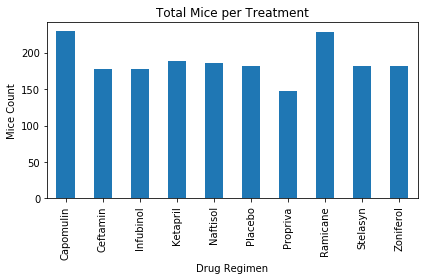

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count_df=pd.DataFrame({"Drug Regimen": clean_data["Drug Regimen"].unique(),
                           "Total Mice": regimen_groups["Timepoint"].count()})
mice_count_df.plot.bar(legend=False)
plt.title("Total Mice per Treatment")
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
plt.tight_layout()

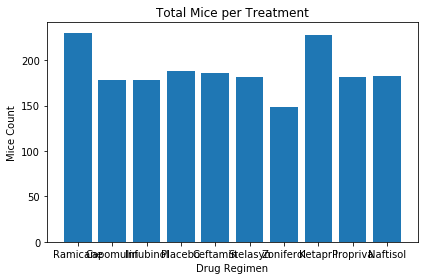

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=clean_data["Drug Regimen"].unique()
total_mice=regimen_groups["Timepoint"].count()

plt.bar(x_axis, total_mice, align="center")
plt.title("Total Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.tight_layout()
plt.show()

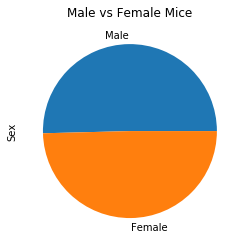

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_info=clean_data.drop_duplicates(subset="Mouse ID", keep="first")
mice_sexes=mice_info["Sex"].value_counts()
mice_sexes_df=pd.DataFrame(mice_sexes)
mice_sexes_df.plot(kind="pie", y="Sex", legend = False, title="Male vs Female Mice")


Text(0.5, 1.0, 'Male vs. Female Mice')

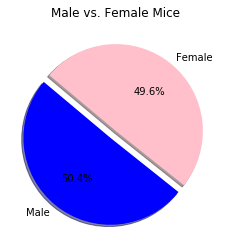

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

genders=["Male", "Female"]
counts=[125, 123]
colors=["Blue", "Pink"]
explode=(0.1,0)

plt.pie(counts, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs. Female Mice")

## Quartiles, Outliers and Boxplots

In [12]:
clean_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_data.drop_duplicates(subset="Mouse ID", keep="last")
last_timepoint.head(10)


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,Ramicane,Male,1,17,45,30.276232,0
64,f966,Capomulin,Male,16,17,20,30.485985,0
74,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,Ramicane,Female,4,17,45,31.560470,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

cap_tumor_volume_df=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Capomulin"]
cap_quartiles = cap_tumor_volume_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = round(cap_quartiles[0.25], 3)
cap_upperq = round(cap_quartiles[0.75], 3)
cap_median = round(cap_quartiles[0.50], 3)
cap_iqr = round(cap_upperq-cap_lowerq, 3)
cap_lower_bound = round(cap_lowerq - (1.5*cap_iqr), 3)
cap_upper_bound = round(cap_upperq + (1.5*cap_iqr), 3)
print(f'''Capomulin:
            lower: {cap_lowerq}
            upper: {cap_upperq}
            median: {cap_median}
            inner: {cap_iqr}
            lower bound: {cap_lower_bound}
            upper bound: {cap_upper_bound}
     ''')

ram_tumor_volume_df=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Ramicane"]
ram_quartiles = ram_tumor_volume_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = round(ram_quartiles[0.25], 3)
ram_upperq = round(ram_quartiles[0.75], 3)
ram_median = round(ram_quartiles[0.50], 3)
ram_iqr = round(ram_upperq-ram_lowerq, 3)
ram_lower_bound = round(ram_lowerq - (1.5*ram_iqr), 3)
ram_upper_bound = round(ram_upperq + (1.5*ram_iqr), 3)
print(f'''Ramicane:
            lower: {ram_lowerq}
            upper: {ram_upperq}
            median: {ram_median}
            inner: {ram_iqr}
            lower bound: {ram_lower_bound}
            upper bound: {ram_upper_bound}
     ''')

inf_tumor_volume_df=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Infubinol"]
inf_quartiles = inf_tumor_volume_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = round(inf_quartiles[0.25], 3)
inf_upperq = round(inf_quartiles[0.75], 3)
inf_median = round(inf_quartiles[0.50], 3)
inf_iqr = round(inf_upperq-inf_lowerq, 3)
inf_lower_bound = round(inf_lowerq - (1.5*inf_iqr), 3)
inf_upper_bound = round(inf_upperq + (1.5*inf_iqr), 3)
print(f'''Infubinol:
            lower: {inf_lowerq}
            upper: {inf_upperq}
            median: {inf_median}
            inner: {inf_iqr}
            lower bound: {inf_lower_bound}
            upper bound: {inf_upper_bound}
     ''')

ceft_tumor_volume_df=last_timepoint.loc[last_timepoint["Drug Regimen"]=="Ceftamin"]
ceft_quartiles = ceft_tumor_volume_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = round(ceft_quartiles[0.25], 3)
ceft_upperq = round(ceft_quartiles[0.75], 3)
ceft_median = round(ceft_quartiles[0.50], 3)
ceft_iqr = round(ceft_upperq-ceft_lowerq, 3)
ceft_lower_bound = round(ceft_lowerq - (1.5*ceft_iqr), 3)
ceft_upper_bound = round(ceft_upperq + (1.5*ceft_iqr), 3)
print(f'''Ceftamin:
            lower: {ceft_lowerq}
            upper: {ceft_upperq}
            median: {ceft_median}
            inner: {ceft_iqr}
            lower bound: {ceft_lower_bound}
            upper bound: {ceft_upper_bound}
     ''')

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = tumor_volume.quantile([.25,.5,.75])

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
cap_volume=cap_tumor_volume_df["Tumor Volume (mm3)"].tolist()
ram_volume=ram_tumor_volume_df["Tumor Volume (mm3)"].tolist()
inf_volume=inf_tumor_volume_df["Tumor Volume (mm3)"].tolist()
ceft_volume=ceft_tumor_volume_df["Tumor Volume (mm3)"].tolist()
    
    # add subset 

    # Determine outliers using upper and lower bounds


Capomulin:
            lower: 32.377
            upper: 40.159
            median: 38.125
            inner: 7.782
            lower bound: 20.704
            upper bound: 51.832
     
Ramicane:
            lower: 31.56
            upper: 40.659
            median: 36.562
            inner: 9.099
            lower bound: 17.911
            upper bound: 54.308
     
Infubinol:
            lower: 54.049
            upper: 65.526
            median: 60.165
            inner: 11.477
            lower bound: 36.834
            upper bound: 82.742
     
Ceftamin:
            lower: 48.722
            upper: 64.3
            median: 59.852
            inner: 15.578
            lower bound: 25.355
            upper bound: 87.667
     


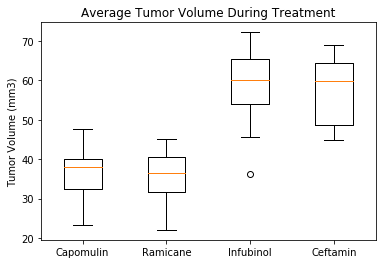

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

volumes = [cap_volume, ram_volume, inf_volume, ceft_volume]

fig1, ax1 = plt.subplots()
ax1.set_title("Average Tumor Volume During Treatment")
ax1.boxplot(volumes)
ax1.set_ylabel('Tumor Volume (mm3)')
plt.xticks([1, 2, 3,4], treatments)

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'S185 Treated with Capomulin')

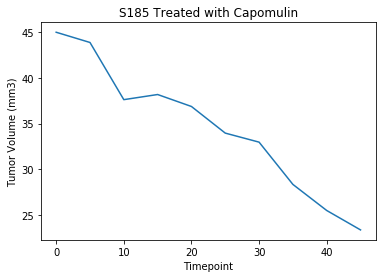

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse = clean_data.loc[clean_data["Mouse ID"] == "s185", :]
cap_mouse=cap_mouse[["Tumor Volume (mm3)" , "Timepoint"]]
cap_mouse=cap_mouse.set_index(["Timepoint"])

cap_mouse.plot(kind="line", legend=False)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")
plt.title("S185 Treated with Capomulin")

Text(0.5, 1.0, 'Capomulin Regimen (Mouse Weight vs Tumor Volume Avg.)')

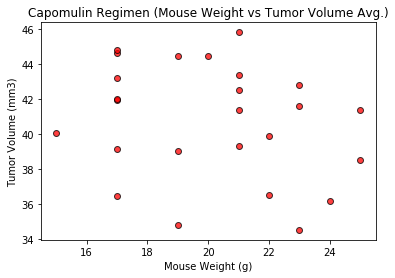

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_mice=clean_data.loc[clean_data["Drug Regimen"]=="Capomulin", :]

single_capo=capo_mice.drop_duplicates(subset="Mouse ID", keep="last")
weights=single_capo["Weight (g)"]
avg_tumor=capo_mice.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weights, avg_tumor, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Regimen (Mouse Weight vs Tumor Volume Avg.)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(weights, avg_tumor)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")

The correlation between weight and average tumor volume is -0.23


In [19]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weights, avg_tumor)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The regression model is ({line_eq}).")

The regression model is (y = -0.26x + 46.05).
